In [ ]:
# Importing libraries and the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Reading the dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")

In [ ]:
# Some quick data exploration
df.head(10)  #Printing the dataset to explore first 10 row datavisually,

In [3]:
# look at summary of numerical fields by using describe() function
# It Printout summary statistics for numerical fields
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
#also look at the median of these variables and compare them with mean
#to see possible skew in the dataset
df['Age'].median()

28.0

In [5]:
#For the non-numerical values (e.g. Sex, Embarked etc.)
#we can look at unique values to understand whether they 
#make sense or not
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
#Distribution analysis
#familiar with basic data characteristics 
#distribution of various variables 
#%matplotlib ::Set up matplotlib to work interactively.
#This function lets you activate matplotlib interactive support at any point during an IPython session. 
#It does not import anything into the interactive namespace.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\sanjay.a.kumar.patel\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\sanjay.a.kumar.patel\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


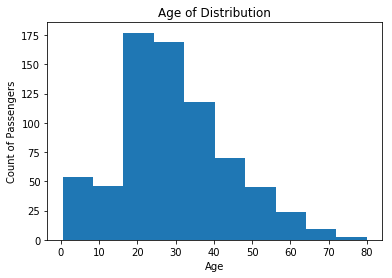

In [7]:
#plot histograms for "Age" and "Fare" using the following commands
fig=plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'],bins=10,range= (df['Age'].min(),df['Age'].max()))
plt.title('Age of Distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

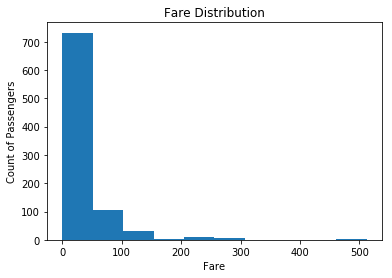

In [8]:
#Plot histogram of "Fare"
fig=plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'],bins=10,range= (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

In [ ]:
#Box plots to understand the distributions.
#Box plot for "Fare" can be plotted by:

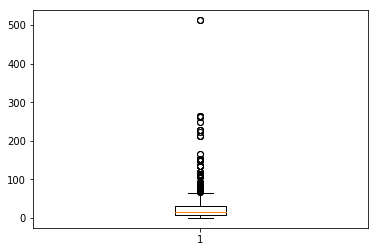

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df['Fare'])
plt.show()


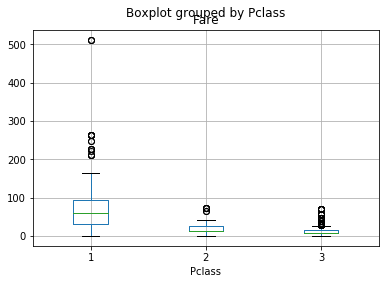

In [10]:
#looking at fare across the 3 passenger classes. 
#Let us segregate them by Passenger class

df.boxplot(column='Fare', by ='Pclass')


##### Clearly, both Age and Fare require some amount of data munging. Age has about 31% missing values, while Fare has a few Outliers, which demand deeper understanding

### Categorical variable analysis:

###### Following code plots the distribution of population by PClass and their probability of survival

Text(0.5,1,'Probability of survival by class')

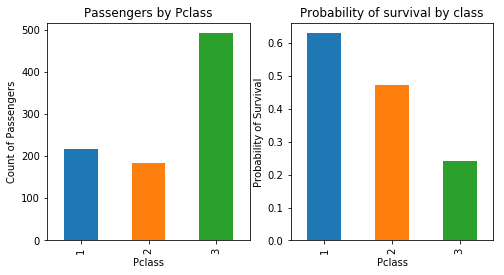

In [11]:
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")



#### These two plots can also be visualized by combining them in a stacked chart:

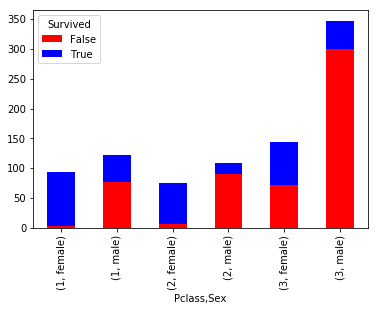

In [12]:
temp3 = pd.crosstab([df.Pclass, df.Sex], df.Survived.astype(bool))
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
